# Test 3 SOM on Kepler and TESS Data

The third test done on the dataset combined with the Kepler and TESS data processed with the Min Max technique. Using the dataset without under-sampling, but eliminating some anomalous characteristics and initializing the SOM weights with 50% composed of Planet values taken randomly, and 50% False Planets.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os

# Added paths to import modules
sys.path.insert(0, os.path.abspath('../'))

from sklearn.model_selection import train_test_split
from simple_som.som_grid_search import SOMGridSearch
from simple_som.som import SimpleSOM
from simple_som.visualization import View
from utils.color import Color
from utils.util import print_count_nan, plot_confusion_matrix
from utils.ditance_metrics import DistanceMetrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [2]:
X_train = pd.read_csv('../data/processed_data/X_kepler_tess.csv')
y_train = pd.read_csv('../data/processed_data/y_kepler_tess.csv')
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print_count_nan(data=X_train, name='X_train')
print_count_nan(data=y_train, name='y_train')
print('X Col', X_train.columns)
print('y Col', y_train.columns)

Shape of X_train: (13798, 18)
Shape of y_train: (13798, 2)
Number of not a numbers values in X_train: 0 out of 248364: 0.00%
Number of not a numbers values in y_train: 0 out of 27596: 0.00%
X Col Index(['Unnamed: 0', 'Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err', 'Planet Radius (R_Earth)',
       'Planet Equil Temp (K)', 'Planet Insolation (Earth Flux)', 'Planet SNR',
       'Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
       'Stellar log(g) (cm/s^2)', 'Stellar Mass (M_Sun)',
       'Stellar Mass (M_Sun) err', 'TESS Mag'],
      dtype='object')
y Col Index(['Unnamed: 0', '0'], dtype='object')


In [3]:
X_train = X_train.drop(columns=['Unnamed: 0','Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
                                'Stellar log(g) (cm/s^2)', 'TESS Mag'])

In [4]:
print('X Col', X_train.columns)
print('y Col', y_train.columns)

X Col Index(['Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err', 'Planet Radius (R_Earth)',
       'Planet Equil Temp (K)', 'Planet Insolation (Earth Flux)', 'Planet SNR',
       'Stellar Mass (M_Sun)', 'Stellar Mass (M_Sun) err'],
      dtype='object')
y Col Index(['Unnamed: 0', '0'], dtype='object')


In [5]:
component_names = ['Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err', 'Planet Radius (R_Earth)',
       'Planet Equil Temp (K)', 'Planet Insolation (Earth Flux)', 'Planet SNR',
       'Stellar Mass (M_Sun)', 'Stellar Mass (M_Sun) err']

In [6]:
X_train = X_train.values
y_train = y_train.drop(columns='Unnamed: 0').values

In [7]:
TESTSET_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=TESTSET_SIZE, 
                                                    random_state=RANDOM_STATE, shuffle=True,
                                                    stratify=None)
print("Number of X_train: ", X_train.shape[0])
print("Number of X_test: ", X_test.shape[0])
print("Number of features: ", X_train.shape[1])

Number of X_train:  11038
Number of X_test:  2760
Number of features:  13


# Grid Search

In [8]:
param_grid = {
    'W': [None],
    'max_iter': [10000],
    'num_rows': [15, 20, 30],
    'num_cols': [15, 20, 30],
    'max_learning_rate': [0.8],
    'max_distance': [10],
    'distance_bmu': [DistanceMetrics.euclidean_distance, DistanceMetrics.manhattan_distance],
    'distance_nr': [DistanceMetrics.euclidean_distance, DistanceMetrics.manhattan_distance],
    'W_PLANET': [0.9],
    'W_FALSE_PLANET': [1],
    'K': [5, 7, 9]
}

In [9]:
grid_search = SOMGridSearch(param_grid=param_grid, n_jobs=4)
best_param, best_score = grid_search.fit(X_train, y_train, X_test, y_test)

print("Best param:", best_param)
print("Best accuracy:", best_score)
#################################################################################
# Best param: {'W': None, 'max_iter': 14000, 'num_rows': 20, 'num_cols': 20,
# 'max_learning_rate': 0.8, 'max_distance': 10,
# 'distance_bmu': <function DistanceMetrics.manhattan_distance at 0x2b3852fc0700>,
# 'distance_nr': <function DistanceMetrics.manhattan_distance at 0x2b3852fc0700>,
# 'W_PLANET': 0.9, 'W_FALSE_PLANET': 1, 'K': 7}
# Best accuracy: 0.775
#################################################################################
# Best param: {'W': None, 'max_iter': 10000, 'num_rows': 30, 'num_cols': 15,
# 'max_learning_rate': 0.8, 'max_distance': 10,
# 'distance_bmu': <function DistanceMetrics.manhattan_distance at 0x7f580509ede0>,
# 'distance_nr': <function DistanceMetrics.euclidean_distance at 0x7f580509ed40>,
# 'W_PLANET': 0.9, 'W_FALSE_PLANET': 1, 'K': 7}
# Best accuracy: 0.7648550724637682

Fitting 1 folds for each of 108 candidates, totalling 108 fits
SOM training completed:  10000  | QE:    0.000001  | LR:    0.000080  | NR:    1.000000  | Time:   40.521763
SOM training completed:  10000  | QE:    0.000001  | LR:    0.000080  | NR:    1.000000  | Time:   45.027960
SOM training completed:  10000  | QE:    0.000001  | LR:    0.000080  | NR:    1.000000  | Time:   46.638682
SOM training completed:  10000  | QE:    0.000001  | LR:    0.000080  | NR:    1.000000  | Time:   48.099328
SOM training completed:  10000  | QE:    0.000001  | LR:    0.000080  | NR:    1.000000  | Time:   43.698426
SOM training completed:  10000  | QE:    0.000001  | LR:    0.000080  | NR:    1.000000  | Time:   43.624325
SOM training completed:  10000  | QE:    0.000002  | LR:    0.000080  | NR:    1.000000  | Time:   43.763069
SOM training completed:  10000  | QE:    0.000002  | LR:    0.000080  | NR:    1.000000  | Time:   44.336151
SOM training completed:  10000  | QE:    0.000002  | LR:    0.000

In [10]:
best_param = {}
best_param['W'] = None
best_param['max_iter'] = 14000
best_param['num_rows'] = 30
best_param['num_cols'] = 30
best_param['max_learning_rate'] = 0.8
best_param['max_distance'] = 10
best_param['distance_bmu'] = DistanceMetrics.manhattan_distance
best_param['distance_nr'] = DistanceMetrics.manhattan_distance
best_param['W_PLANET'] = 0.9
best_param['W_FALSE_PLANET'] = 1
best_param['K'] = 7

In [11]:
W = best_param['W']
max_iter = 20000 # best_param['max_iter']
num_rows = best_param['num_rows']
num_cols = best_param['num_cols']
max_learning_rate = best_param['max_learning_rate']
max_distance = best_param['max_distance']
distance_bmu = best_param['distance_bmu']
distance_nr = best_param['distance_nr']
w_planet = best_param['W_PLANET']
w_false_planet = best_param['W_FALSE_PLANET']
K = best_param['K']

In [12]:
som = SimpleSOM(X_train=X_train, y_train=y_train, W=None, max_iter=max_iter, 
                num_rows=num_rows, num_cols=num_cols, max_learning_rate=max_learning_rate,
                max_distance=max_distance, distance_bmu=distance_bmu, distance_nr=distance_nr, 
                W_PLANET=w_planet, W_FALSE_PLANET=w_false_planet, K=K, n_jobs=4)
params = som.fit(X_data=X_train, verbose=2)

Iteration:  00001  | QE:    0.000003  | LR:    0.800000  | NR:   10.000000  | Time:    0.015061
Iteration:  01000  | QE:    0.000004  | LR:    0.760040  | NR:   10.000000  | Time:    6.756067
Iteration:  02000  | QE:    0.000002  | LR:    0.720040  | NR:   10.000000  | Time:    7.072449
Iteration:  03000  | QE:    0.000001  | LR:    0.680040  | NR:    9.000000  | Time:    6.803989
Iteration:  04000  | QE:    0.000008  | LR:    0.640040  | NR:    9.000000  | Time:    6.812334
Iteration:  05000  | QE:    0.000002  | LR:    0.600040  | NR:    8.000000  | Time:    6.759167
Iteration:  06000  | QE:    0.000002  | LR:    0.560040  | NR:    8.000000  | Time:    7.125854
Iteration:  07000  | QE:    0.000005  | LR:    0.520040  | NR:    7.000000  | Time:    7.043362
Iteration:  08000  | QE:    0.000004  | LR:    0.480040  | NR:    7.000000  | Time:    7.222176
Iteration:  09000  | QE:    0.000002  | LR:    0.440040  | NR:    6.000000  | Time:    7.099152
Iteration:  10000  | QE:    0.000003  | 

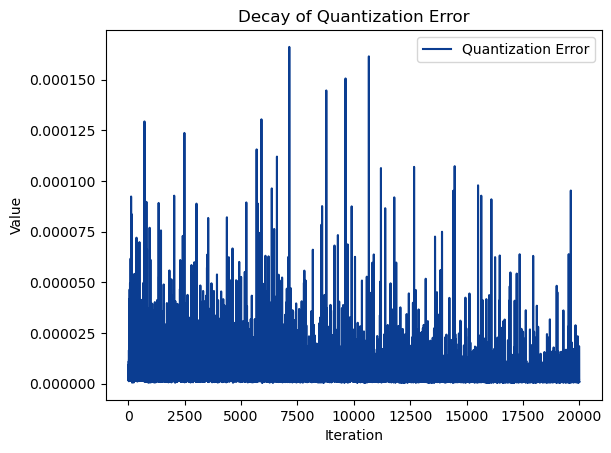

In [13]:
REDUCE = 1
plt.plot(range(max_iter//REDUCE), params['errors'][::REDUCE], 
         label='Quantization Error', color=Color.SEA.value)
plt.title('Decay of Quantization Error')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

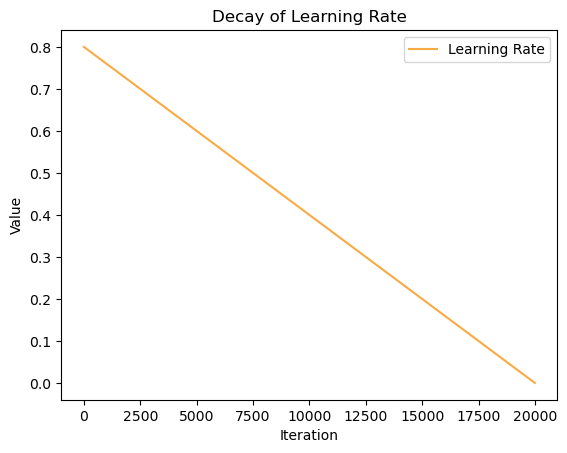

In [14]:
plt.plot(range(max_iter), params['lr'], label='Learning Rate', color=Color.SUN.value)
plt.title('Decay of Learning Rate')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

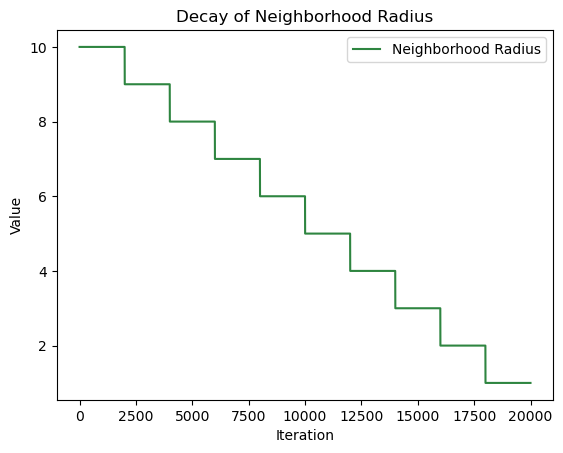

In [15]:
plt.plot(range(max_iter), params['nr'], label='Neighborhood Radius', color=Color.EARTH.value)
plt.title('Decay of Neighborhood Radius')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

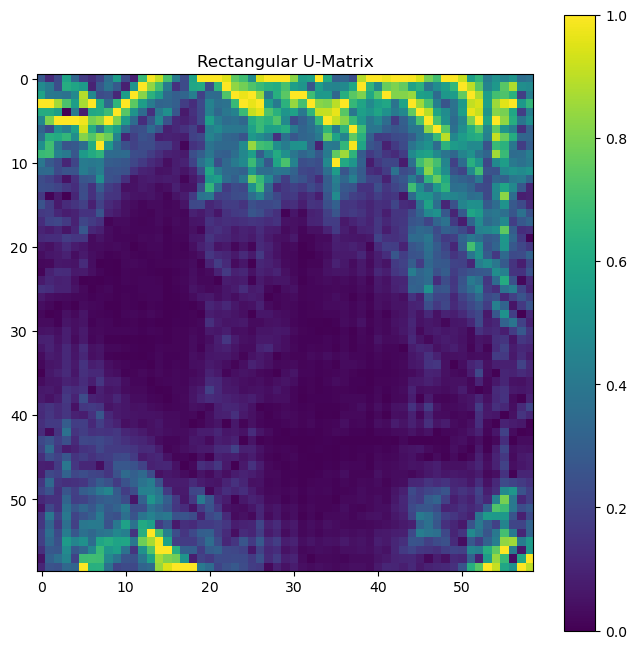

In [16]:
u_matrix_rect = View.make_u_rect(som=som)
plt.figure(figsize=(8, 8))
plt.imshow(u_matrix_rect, cmap='viridis', interpolation='none')
plt.title('Rectangular U-Matrix')
plt.colorbar()
plt.show()

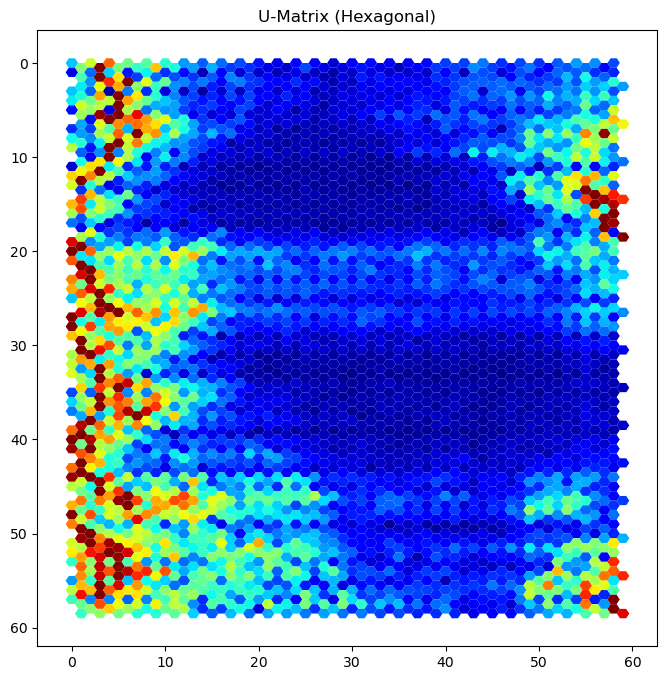

In [17]:
u_matrix_hex = View.make_u_hex(som=som)
fig, ax = plt.subplots(figsize=(8,8))
View.draw_hex_grid(som, ax, u_matrix_hex)
plt.show()

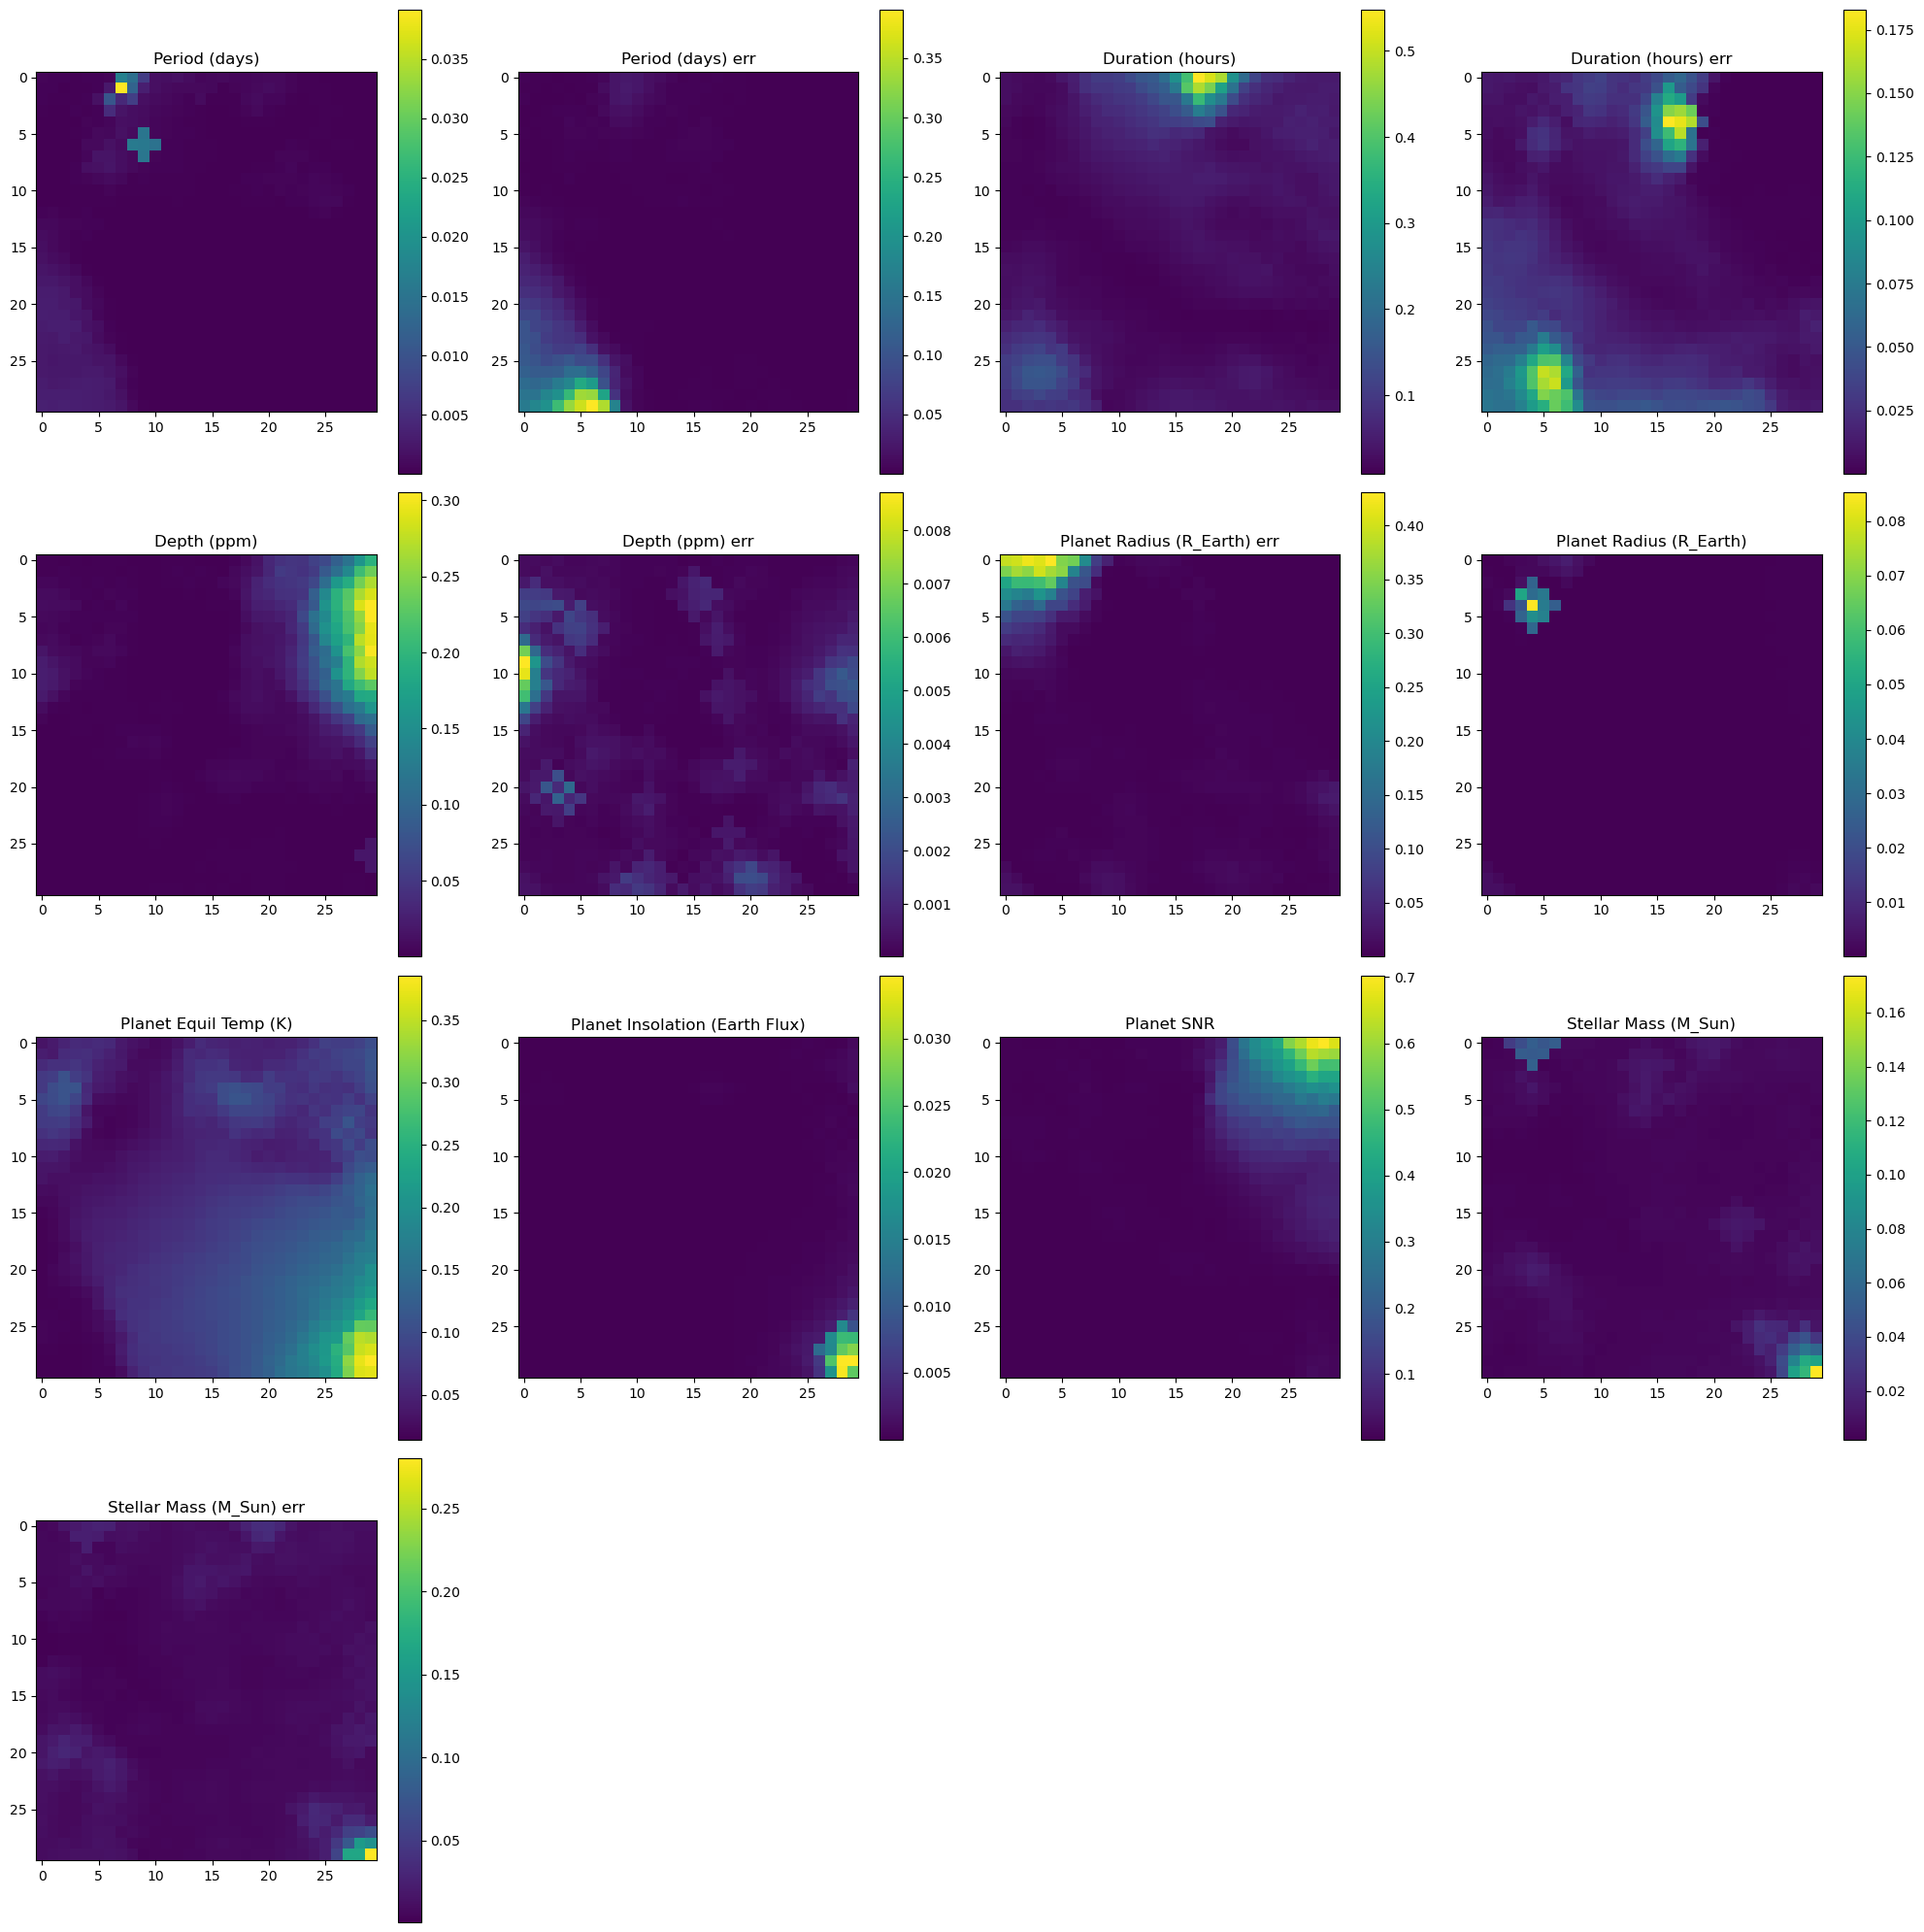

In [18]:
fig = plt.figure(figsize=(20, 20))
View.make_u_slide(component_names=component_names, som=som)
plt.show()

In [19]:
BMUs, BMU_labels = som.calculate_bmu_and_labels()
BMU_label_combinations = list(zip(BMUs, BMU_labels))
BMU_counts = som.bmu_occurrences()
coord_label = som.compute_coordinates_label()
som.print_bmu_label()

(12, 8) -> Planet:  39, False Planet:   0
(22, 19)-> Planet:   0, False Planet:  57
(20, 5) -> Planet:   0, False Planet:  11
(11, 5) -> Planet:  37, False Planet:   0
(29, 18)-> Planet:  12, False Planet:   0
(22, 8) -> Planet:  11, False Planet:   0
(25, 18)-> Planet:   0, False Planet:   9
(23, 26)-> Planet:   0, False Planet:  36
(4, 1)  -> Planet:  10, False Planet:   0
(2, 23) -> Planet:   0, False Planet:  10
(16, 7) -> Planet:  34, False Planet:   0
(5, 10) -> Planet:  35, False Planet:   0
(12, 21)-> Planet:   0, False Planet:  26
(11, 7) -> Planet:  35, False Planet:   0
(23, 9) -> Planet:   9, False Planet:   0
(13, 19)-> Planet:  35, False Planet:   0
(16, 27)-> Planet:   0, False Planet:   8
(15, 1) -> Planet:  12, False Planet:   0
(14, 8) -> Planet:  19, False Planet:   0
(8, 27) -> Planet:   0, False Planet:   7
(16, 28)-> Planet:   0, False Planet:   3
(16, 13)-> Planet:  33, False Planet:   0
(13, 8) -> Planet:  48, False Planet:   0
(10, 1) -> Planet:  19, False Plan

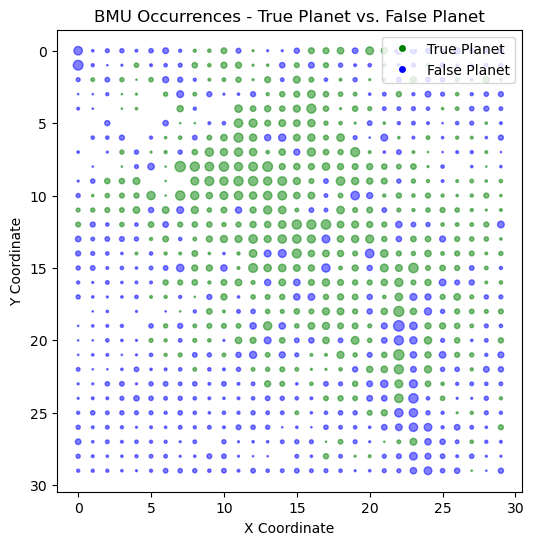

In [20]:
fig, ax = plt.subplots(figsize=(6, 6))
View.plot_bmu_occurrences_with_planet_noplanet(ax=ax, coord_label=coord_label)
plt.show()

In [21]:
map = som.collecting_labels(X_train, y_train)
label_map = som.construct_label_map(X_train, y_train)
label_map_kw = som.construct_label_map_weighed(X_train, y_train)
label_map_kcw = som.construct_label_map_occ_weighed(X_train, y_train)

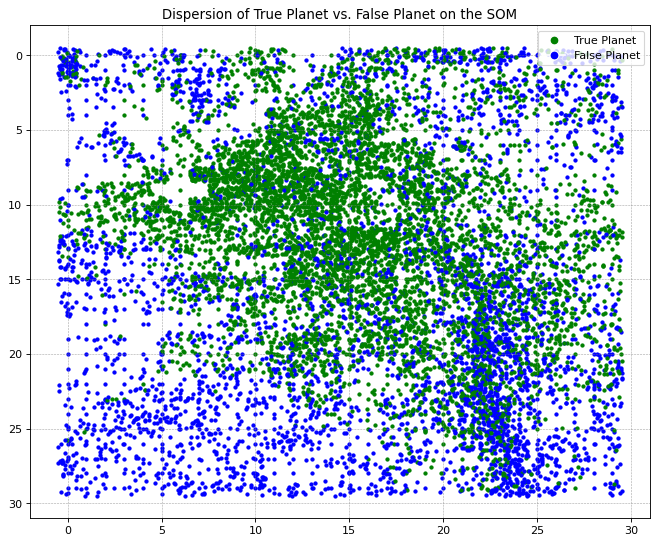

In [22]:
View.plot_dispersion_observation_on_som(X_train=X_train, BMUs=BMUs, BMU_labels=BMU_labels)

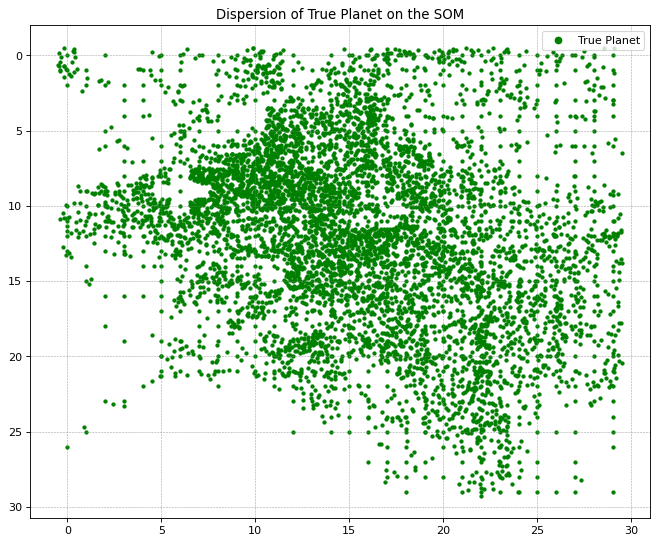

In [23]:
View.plot_class_dispersion_observation_on_som(X_train=X_train, BMUs=BMUs, 
                                              BMU_labels=BMU_labels, classes=1)

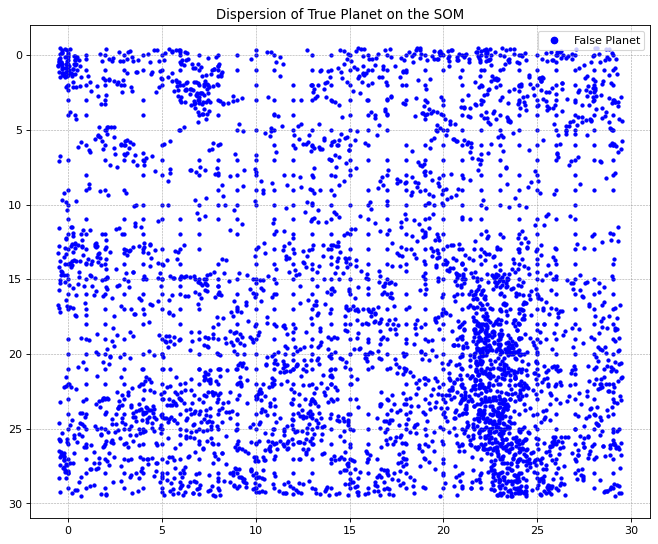

In [24]:
View.plot_class_dispersion_observation_on_som(X_train=X_train, BMUs=BMUs, 
                                              BMU_labels=BMU_labels, classes=0)

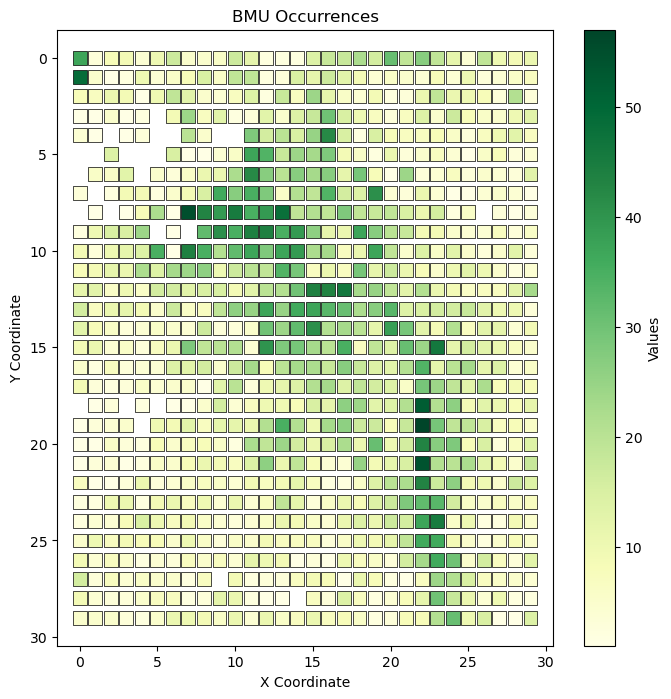

In [25]:
x_coords, y_coords, counts_occ = som.compute_occurrences_plot()

plt.figure(figsize=(8, 8))
sc = plt.scatter(x_coords, y_coords, c=counts_occ, cmap='YlGn', 
                 s=100, marker='s', edgecolors='black', linewidths=0.5)
plt.colorbar(sc, label='Values')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('BMU Occurrences')
plt.gca().invert_yaxis()
plt.show()

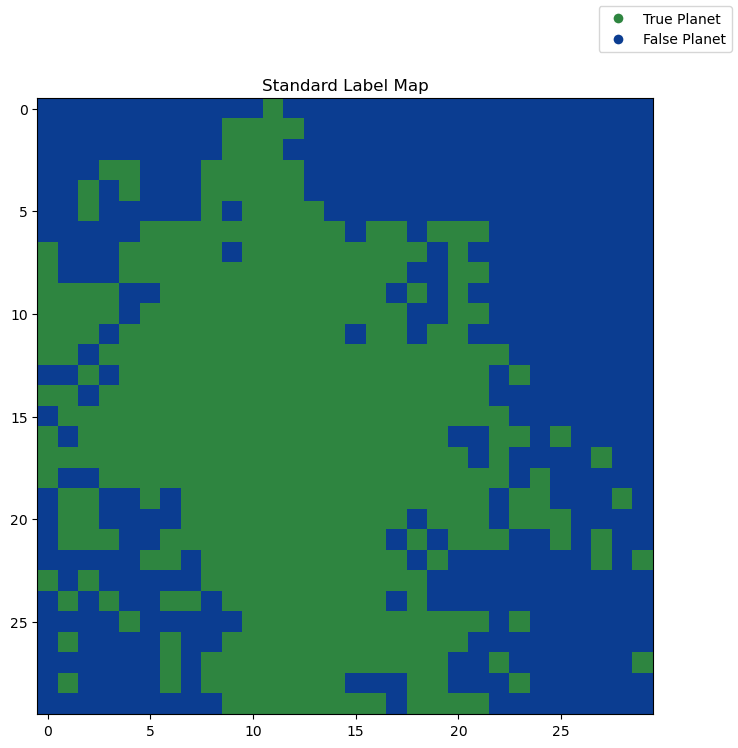

In [26]:
title = ('Standard Label Map')
View.plot_label_map(label_map=label_map, title=title)

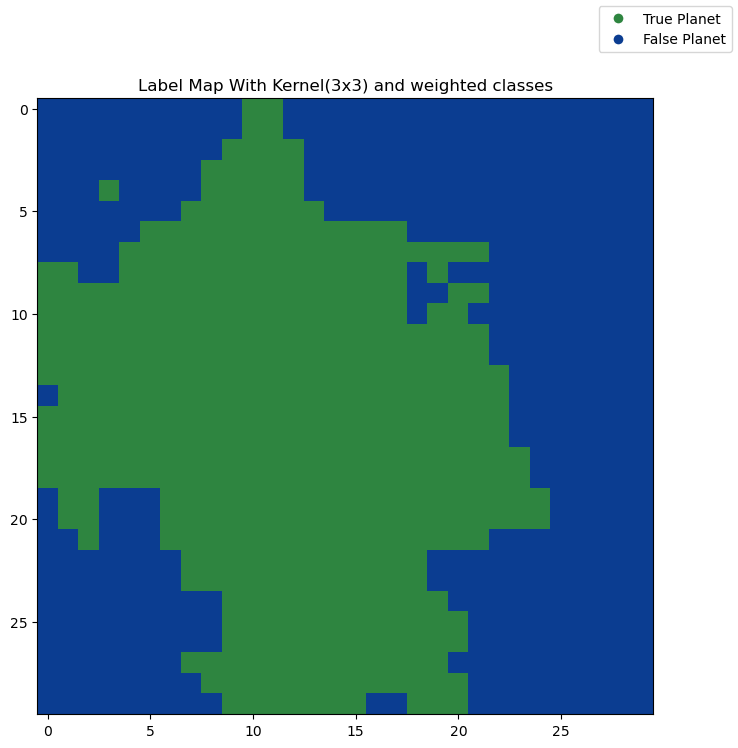

In [27]:
title = ('Label Map With Kernel(3x3) and weighted classes')
View.plot_label_map(label_map=label_map_kw, title=title)

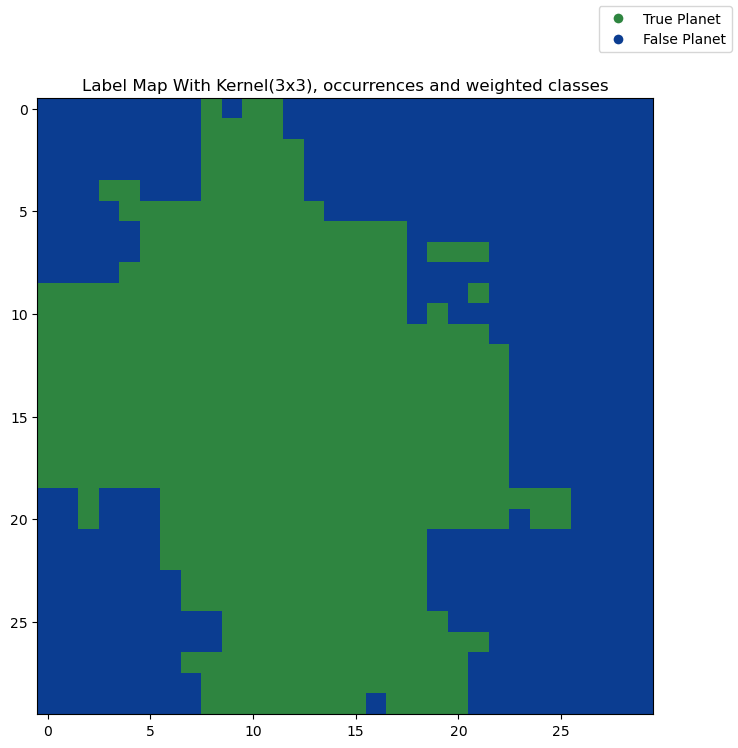

In [28]:
title = ('Label Map With Kernel(3x3), occurrences and weighted classes')
View.plot_label_map(label_map=label_map_kcw, title=title)

Accuracy: 0.756159420289855
F1-score: 0.8057720057720057
Precision: 0.77728285077951
Recall: 0.8364289994008388
cm:  [[ 691  400]
 [ 273 1396]]


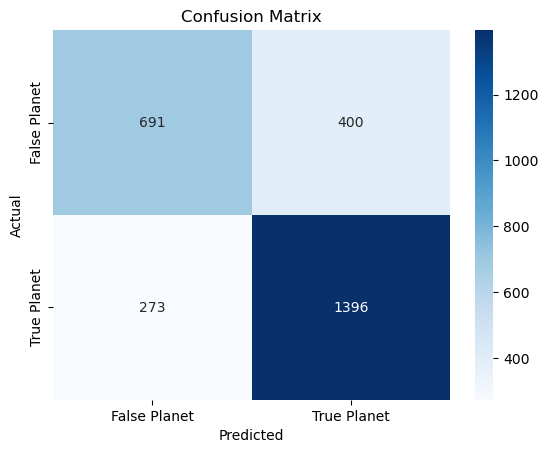

In [29]:
predicted = som.predict(X_train=X_train, y_train=y_train, X_test=X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)

Accuracy: 0.7583333333333333
F1-score: 0.8098089535215283
Precision: 0.7725788900979326
Recall: 0.8508088675853804
cm:  [[ 673  418]
 [ 249 1420]]


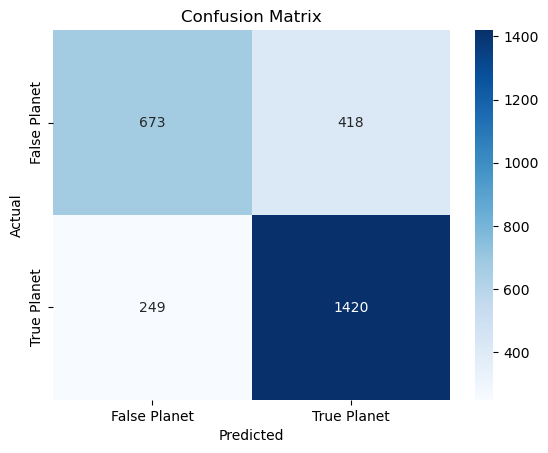

In [30]:
predicted = som.predict_kw(X_train, y_train, X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)

Accuracy: 0.7536231884057971
F1-score: 0.8031268094962363
Precision: 0.77703081232493
Recall: 0.8310365488316357
cm:  [[ 693  398]
 [ 282 1387]]


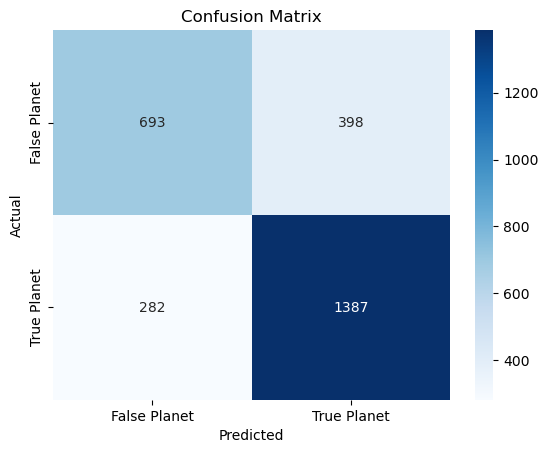

In [31]:
predicted = som.predict_kcw(X_train, y_train, X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)

Accuracy: 0.7626811594202898
F1-score: 0.8142897646725261
Precision: 0.7728740581270183
Recall: 0.8603954463750749
cm:  [[ 669  422]
 [ 233 1436]]


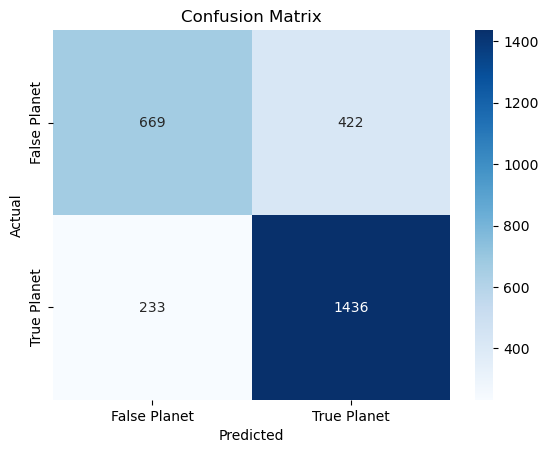

In [32]:
predicted = som.predict_knn(X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)